In [167]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
import numpy as np

# random seed for reproducability
keras.utils.set_random_seed(7)

# define layers
inputs = Input(shape=(2,), name='input')
dense1 = Dense(5, name='hidden')(inputs)
relu1 = Activation('relu', name='relu')(dense1)
outputs = Dense(1, name='output')(relu1)

# assemble as model
model = Model(inputs=inputs, outputs=outputs, name='demo_model')

# let's get a summary of the model
print(model.summary())

Model: "demo_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [168]:
# create single sample
x = np.array([[1.0, 2.0]])
print("Input:", x)

Input: [[1. 2.]]


In [169]:
# extract hidden layer, i.e. (Dense(3), from model
hidden = model.get_layer('hidden')

# extract weights and biases
weights, biases = hidden.get_weights()
print("Weights:", weights)
print("Biases:", biases)

Weights: [[-0.3380742   0.42563713  0.84048843 -0.31564182 -0.20789051]
 [ 0.03111869 -0.37955213  0.28642786  0.14114225  0.8278092 ]]
Biases: [0. 0. 0. 0. 0.]


In [170]:
# forward pass x through hidden layer (i.e. Dense / Fully connected / Perceptron / Linear transformation / y = wx+b)
hidden_output = hidden(x)
print("After dense layer:", hidden_output.numpy())

# manual matrix multiplication (x times weights)
print("Manual matmul:", x @ weights + biases) # the @ is numpy operator for matrix multiplication (matmul)

After dense layer: [[-0.27583683 -0.33346713  1.4133441  -0.03335732  1.4477279 ]]
Manual matmul: [[-0.27583683 -0.33346713  1.41334414 -0.03335732  1.44772792]]


In [171]:
# extract ReLU activation "layer"
relu = model.get_layer('relu')

# forward pass hidden_output through ReLU activation layer
relu_output = relu(hidden_output)
print("After ReLU:", relu_output.numpy())

After ReLU: [[0.        0.        1.4133441 0.        1.4477279]]


In [172]:
# extract output layer
output = model.get_layer('output')

# extract weights and biases
weights, biases = output.get_weights()
print("Weights:", weights)
print("Biases:", biases)

Weights: [[ 0.8569534 ]
 [ 0.7584214 ]
 [-0.63953614]
 [ 0.10828829]
 [ 0.7599652 ]]
Biases: [0.]


In [173]:
# forward pass relu_output through output layer
output_output = output(relu_output)
print("After output layer:", output_output.numpy())

# manual matrix multiplication (relu_output times weights)
print("Manual matmul:", relu_output.numpy() @ weights + biases) # the @ is numpy operator for matrix multiplication (matmul)

After output layer: [[0.19633816]]
Manual matmul: [[0.19633818]]


In [174]:
# simply forward pass x through entire model
final_output = model(x)
print("Final output:", final_output.numpy())

Final output: [[0.19633816]]


In [175]:
# let's add a sigmoid activation to the output for binary classification (like logistic regression!)
sigmoided_outputs = Activation('sigmoid', name='sigmoid')(outputs)
model = Model(inputs=inputs, outputs=sigmoided_outputs, name='sigmoided_model')

# let's get a summary of the new model
print(model.summary())

Model: "sigmoided_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sigmoid (Activation)            │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [176]:
# our model isn't fitted - weights are random and biases are 0.0
# we compile the model (with sgd)
model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.01), # could also just use optimizer='adamw' or 'sgd' for stochastic gradient descent
              loss='binary_crossentropy', # what is being optimized, i.e. minimized, entropy for classification
              metrics=['accuracy']) # accuracy as displayed metric

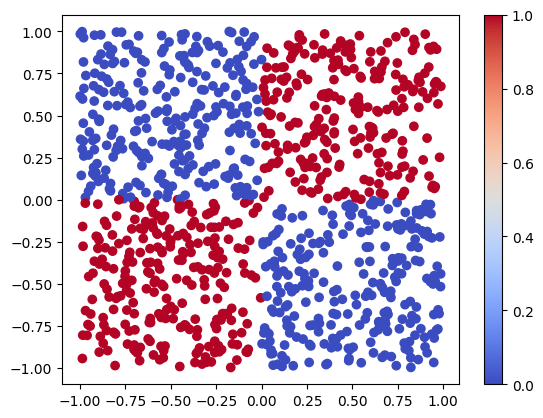

In [177]:
# we dont have any data, lets generate some non-linear that fits x1, x2 => y
X = np.random.uniform(-1, 1, (1000, 2)) # 1000 samples of x1, x2 with random values between -1 and 1
y = (X[:, 0] * X[:, 1] > 0) # binary y = x1 * x2 > 0

# visualize samples
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.colorbar()
plt.show()

In [178]:
# quick split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# fit neural network
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128, # how many samples are run through the model at the same time
    validation_split=0.2, # i didnt manually split an extra time to get validation, i just separate it from the training data
    verbose=1
)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3954 - loss: 0.7640 - val_accuracy: 0.4500 - val_loss: 0.7603
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4686 - loss: 0.7380 - val_accuracy: 0.5063 - val_loss: 0.7329
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5072 - loss: 0.7172 - val_accuracy: 0.5000 - val_loss: 0.7108
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5458 - loss: 0.6989 - val_accuracy: 0.5375 - val_loss: 0.6924
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5848 - loss: 0.6833 - val_accuracy: 0.5875 - val_loss: 0.6786
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6165 - loss: 0.6719 - val_accuracy: 0.6313 - val_loss: 0.6687
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6319 - loss: 0.6632 - val_accuracy: 0.6313 - val_loss: 0.6603
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6644 - loss: 0.6548 - val_accuracy: 0.6625 - val_loss: 0.651

In [179]:
# evaluate on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_mae:.4f}")

# compare to linear regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, linear_pred))

Test Loss: 0.0920
Test Accuracy: 0.9950
Logistic Regression Accuracy: 0.34
